# Análisis de Árbol de Decisiones: Reglas Manuales vs Algoritmo

Este notebook presenta un análisis comparativo entre reglas de decisión manuales y un algoritmo de árbol de decisiones para predecir si se debe jugar al aire libre basado en condiciones climáticas.

## Objetivos:
- Comparar la efectividad de reglas manuales vs algoritmos de árbol de decisiones
- Visualizar el árbol de decisión generado
- Evaluar la precisión de ambos métodos
- Generar un reporte HTML completo

## Dataset:
- **Archivo**: weather_dataset.xlsx
- **Variables**: Outlook, Temperature, Humidity, Windy, Play
- **Objetivo**: Predecir si se debe jugar (Play: yes/no)


## 1. Instalación e Importación de Librerías

Primero, instalamos las librerías necesarias y las importamos.


In [1]:
# Instalación de librerías (ejecutar solo si es necesario)
# !pip install pandas numpy matplotlib scikit-learn seaborn openpyxl

# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import base64
from io import BytesIO
from datetime import datetime
import os

# Configuración para visualizaciones
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Librerías importadas correctamente")


Librerías importadas correctamente


In [2]:
def cargar_dataset(dataset_path: str) -> pd.DataFrame:
    """
    Carga un dataset (CSV o Excel) desde una ruta específica.
    Parámetros:
        dataset_path (str): ruta completa o relativa al archivo de datos.
    Retorna:
        pd.DataFrame: datos cargados en un DataFrame de pandas.
    """
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"El archivo no existe: {dataset_path}")

    formato = os.path.splitext(dataset_path)[1].lower()

    if formato == ".csv":
        df = pd.read_csv(dataset_path)
    elif formato in [".xls", ".xlsx"]:
        df = pd.read_excel(dataset_path)
    else:
        raise ValueError(f"Formato de dataset no soportado: {formato}")

    return df

In [3]:
def regla_decision(instancia):
    """
    Aplica la regla de decisión manual:
    - Si lluvia y sin viento, juega
    - En cualquier otro caso, no juega
    """
    # Regla 1: Si lluvia y sin viento, juega
    if (instancia["Outlook"] == "rain") and (instancia["Windy"] == False):
        return "yes"
    return "no"

    
def aplicar_regla(df):
    """
    Aplica la regla creada de manera manual y calcula métricas
    """
    df["Prediccion"] = df.apply(regla_decision, axis=1)
    # conteo de la instancia con "Play"=='yes'
    aciertos = (df["Prediccion"] == df["Play"]).sum()
    # ponderación
    precision = aciertos / len(df)
    return df["Prediccion"], aciertos, precision

In [4]:
def codificar_dataset(df):
    """
    Convierte columnas de texto a números usando LabelEncoder
    """
    df_codificado = df.copy()
    # codifica solo columnas texto (object) y la clase
    for col in df_codificado.columns:
        if df_codificado[col].dtype == "object":
            labelEncoder = LabelEncoder()
            df_codificado[col] = labelEncoder.fit_transform(df_codificado[col])
    return df_codificado

In [5]:
def entrenar_modelo(arbol, training_atributes, training_class):
    """
    Entrena el modelo en base a los atributos y clase
    """
    arbol.fit(training_atributes, training_class)
    return arbol

def evaluar_modelo(arbol, test_atributes, test_class):
    """
    Calcula predicciones, aciertos y precisión
    """
    predicciones = arbol.predict(test_atributes)
    aciertos = (predicciones == test_class).sum()
    precision = aciertos / len(test_class)
    return predicciones, aciertos, precision

## 3. Carga y Exploración del Dataset

Cargamos el dataset y realizamos una exploración inicial de los datos.


In [6]:
# Cargar el dataset
print(" Cargando dataset...")
df = cargar_dataset("../data/weather_dataset.xlsx")

print(f" Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"Columnas: {list(df.columns)}")

# Mostrar las primeras filas
print("\n Primeras 5 filas del dataset:")
df.head()


 Cargando dataset...
 Dataset cargado exitosamente
Dimensiones: 14 filas × 5 columnas
Columnas: ['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play']

 Primeras 5 filas del dataset:


,Outlook,Temperature,Humidity,Windy,Play
0,sunny,75,70,True,yes
1,sunny,80,90,True,no
2,sunny,85,85,False,no
3,sunny,72,95,False,no
4,sunny,69,70,False,yes


In [7]:
# Información general del dataset
print(" Información del dataset:")
print(f"Tipos de datos:")
print(df.dtypes)
print(f"\nValores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

 Información del dataset:
Tipos de datos:
Outlook        object
Temperature     int64
Humidity        int64
Windy            bool
Play           object
dtype: object

Valores únicos por columna:
Outlook: ['sunny' 'overcast' 'rain']
Temperature: [75 80 85 72 69 83 64 81 71 65 68 70]
Humidity: [70 90 85 95 78 65 75 80 96]
Windy: [ True False]
Play: ['yes' 'no']


## 4. Aplicación de Regla de Decisión Manual

Aplicamos la regla de decisión manual definida: "Si lluvia y sin viento, juega; en cualquier otro caso, no juega".


In [8]:
# Aplicar la regla de decisión manual
print("Aplicando regla de decisión manual...")
print("Regla: Si lluvia y sin viento → juega, en cualquier otro caso → no juega")

prediccion_columna_objetivo, aciertos, precision = aplicar_regla(df)

print(f"\n Resultados de la regla manual:")
print(f" Aciertos: {aciertos} de {len(df)} instancias")
print(f" Precisión: {precision:.3f} ({precision*100:.1f}%)")

# Mostrar las predicciones
print(f"\n Predicciones de la regla manual:")
print(prediccion_columna_objetivo)

# Crear un DataFrame con las predicciones para comparar
df_con_predicciones = df.copy()
df_con_predicciones['Prediccion_Manual'] = prediccion_columna_objetivo
print(f"\n Dataset con predicciones manuales:")
df_con_predicciones[['Outlook', 'Windy', 'Play', 'Prediccion_Manual']]


Aplicando regla de decisión manual...
Regla: Si lluvia y sin viento → juega, en cualquier otro caso → no juega

 Resultados de la regla manual:
 Aciertos: 8 de 14 instancias
 Precisión: 0.571 (57.1%)

 Predicciones de la regla manual:
0      no
1      no
2      no
3      no
4      no
5      no
6      no
7      no
8      no
9      no
10     no
11    yes
12    yes
13    yes
Name: Prediccion, dtype: object

 Dataset con predicciones manuales:


,Outlook,Windy,Play,Prediccion_Manual
0,sunny,True,yes,no
1,sunny,True,no,no
2,sunny,False,no,no
3,sunny,False,no,no
4,sunny,False,yes,no
5,overcast,True,yes,no
6,overcast,False,yes,no
7,overcast,True,yes,no
8,overcast,False,yes,no
9,rain,True,no,no


## 5. Preparación de Datos para Árbol de Decisión

Codificamos las variables categóricas y preparamos los datos para el algoritmo de árbol de decisión.


In [9]:
# Codificar el dataset (convertir variables categóricas a numéricas)
print(" Codificando variables categóricas...")
df_codificado = codificar_dataset(df)

print(" Dataset codificado:")
print(f" Dimensiones: {df_codificado.shape}")
print(f" Tipos de datos después de codificación:")
print(df_codificado.dtypes)

# Mostrar el dataset codificado
print(f"\n Dataset codificado (primeras 5 filas):")
df_codificado.head()


 Codificando variables categóricas...
 Dataset codificado:
 Dimensiones: (14, 6)
 Tipos de datos después de codificación:
Outlook        int64
Temperature    int64
Humidity       int64
Windy           bool
Play           int64
Prediccion     int64
dtype: object

 Dataset codificado (primeras 5 filas):


,Outlook,Temperature,Humidity,Windy,Play,Prediccion
0,2,75,70,True,1,0
1,2,80,90,True,0,0
2,2,85,85,False,0,0
3,2,72,95,False,0,0
4,2,69,70,False,1,0


In [10]:
# Separar atributos y variable objetivo
columna_objetivo = "Play"
atributos = df_codificado.drop(columns=[columna_objetivo])
clase = df_codificado[columna_objetivo]

print(f" Variable objetivo: {columna_objetivo}")
print(f" Atributos: {list(atributos.columns)}")
print(f" Dimensiones - Atributos: {atributos.shape}, Clase: {clase.shape}")

# Dividir el dataset en entrenamiento y prueba
random_seed = 10
porcion_datos_entrenamiento = 0.2  # 20% para prueba, 80% para entrenamiento

atributos_training, atributos_test, clase_training, clase_test = train_test_split(
    atributos,
    clase,
    test_size=porcion_datos_entrenamiento,
    random_state=random_seed,
)

print(f"\n División del dataset:")
print(f" Entrenamiento: {atributos_training.shape[0]} instancias ({100-porcion_datos_entrenamiento*100:.0f}%)")
print(f" Prueba: {atributos_test.shape[0]} instancias ({porcion_datos_entrenamiento*100:.0f}%)")
print(f" Semilla aleatoria: {random_seed}")


 Variable objetivo: Play
 Atributos: ['Outlook', 'Temperature', 'Humidity', 'Windy', 'Prediccion']
 Dimensiones - Atributos: (14, 5), Clase: (14,)

 División del dataset:
 Entrenamiento: 11 instancias (80%)
 Prueba: 3 instancias (20%)
 Semilla aleatoria: 10


## 6. Entrenamiento del Árbol de Decisión

Creamos y entrenamos el modelo de árbol de decisión.


In [11]:
# Crear y entrenar el árbol de decisión
print(" Creando árbol de decisión...")
arbol = DecisionTreeClassifier(random_state=random_seed)

print(" Entrenando el modelo...")
modelo = entrenar_modelo(arbol, atributos_training, clase_training)

print(" Modelo entrenado exitosamente")
print(f" Características del árbol:")
print(f"   - Profundidad: {arbol.get_depth()} niveles")
print(f"   - Nodos hoja: {arbol.get_n_leaves()}")
print(f"   - Número de características: {arbol.n_features_in_}")
print(f"   - Características utilizadas: {list(atributos.columns)}")


 Creando árbol de decisión...
 Entrenando el modelo...
 Modelo entrenado exitosamente
 Características del árbol:
   - Profundidad: 4 niveles
   - Nodos hoja: 5
   - Número de características: 5
   - Características utilizadas: ['Outlook', 'Temperature', 'Humidity', 'Windy', 'Prediccion']


## 7. Evaluación del Árbol de Decisión

Evaluamos el rendimiento del árbol de decisión en el conjunto de prueba.


In [12]:
# Evaluar el árbol de decisión
print("Evaluando el árbol de decisión...")
predicciones_arbol, aciertos_arbol, precision_arbol = evaluar_modelo(
    arbol, atributos_test, clase_test
)

print(f"\n Resultados del árbol de decisión:")
print(f" Aciertos: {aciertos_arbol} de {len(clase_test)} instancias")
print(f" Precisión: {precision_arbol:.3f} ({precision_arbol*100:.1f}%)")

# Mostrar las predicciones del árbol
print(f"\n Predicciones del árbol de decisión:")
print(predicciones_arbol)

# Crear DataFrame de comparación
comparacion = pd.DataFrame({
    'Real': clase_test.values,
    'Prediccion_Arbol': predicciones_arbol
})
print(f"\n Comparación de predicciones (conjunto de prueba):")
comparacion


Evaluando el árbol de decisión...

 Resultados del árbol de decisión:
 Aciertos: 2 de 3 instancias
 Precisión: 0.667 (66.7%)

 Predicciones del árbol de decisión:
[1 1 1]

 Comparación de predicciones (conjunto de prueba):


,Real,Prediccion_Arbol
0,0,1
1,1,1
2,1,1


## 8. Visualización del Árbol de Decisión

Generamos una visualización del árbol de decisión entrenado.


 Generando visualización del árbol de decisión...


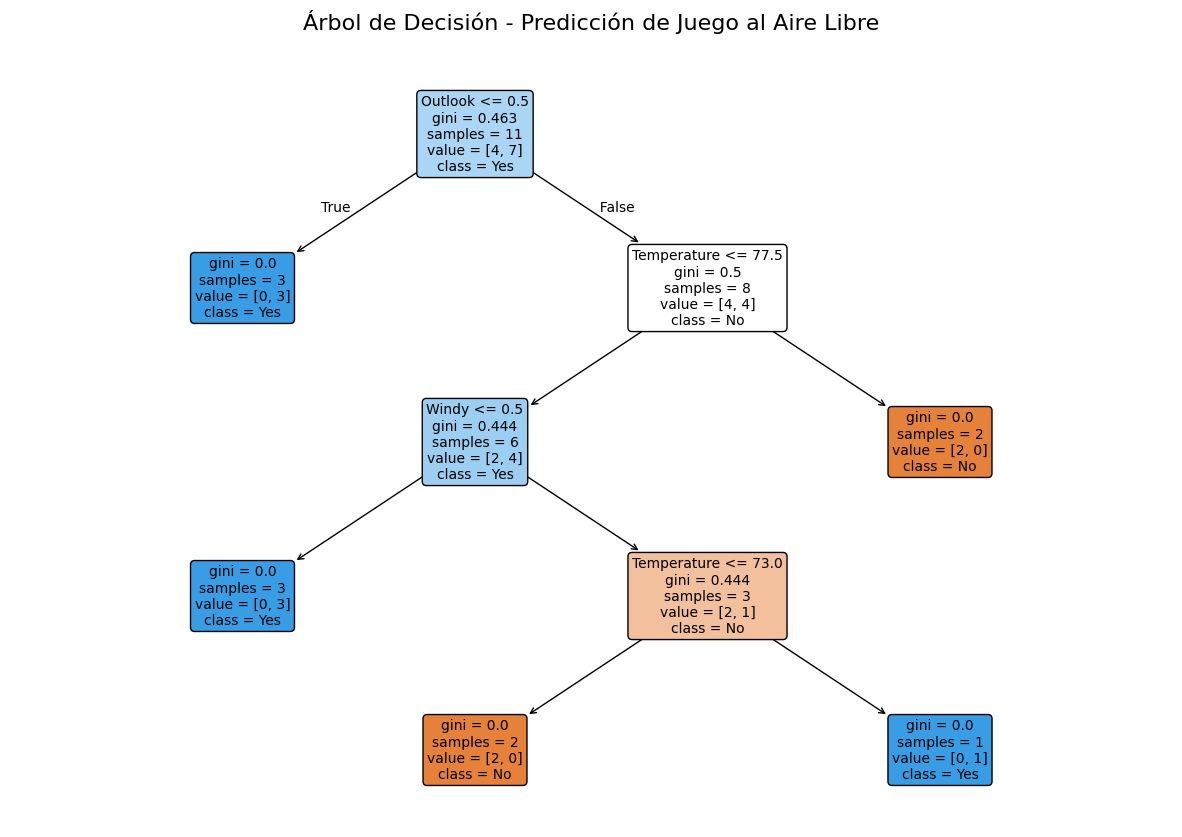

 Visualización del árbol generada
 Información del árbol:
   - Nodos totales: 9
   - Profundidad máxima: 4
   - Nodos hoja: 5


In [13]:
# Visualizar el árbol de decisión
print(" Generando visualización del árbol de decisión...")

plt.figure(figsize=(15, 10))
tree.plot_tree(
    arbol,
    feature_names=atributos.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Predicción de Juego al Aire Libre", fontsize=16, pad=20)
plt.show()

print(" Visualización del árbol generada")
print(f" Información del árbol:")
print(f"   - Nodos totales: {arbol.tree_.node_count}")
print(f"   - Profundidad máxima: {arbol.get_depth()}")
print(f"   - Nodos hoja: {arbol.get_n_leaves()}")


## 9. Comparación de Resultados

Comparamos los resultados entre la regla manual y el árbol de decisión.


## 12. Conclusiones y Resumen

Resumen final del análisis y conclusiones obtenidas.


In [14]:
print("=" * 70)
print("                    RESUMEN DEL ANÁLISIS                    ")
print("=" * 70)

print(f"\n Dataset:")
print(f"   - Nombre: weather_dataset.xlsx")
print(f"   - Instancias totales: {df.shape[0]}")
print(f"   - Atributos: {df.shape[1]}")
print(f"   - Variables: {', '.join(df.columns)}")

print(f"\n Regla Manual:")
print(f"   - Regla aplicada: Si lluvia y sin viento → juega")
print(f"   - Precisión: {precision:.3f} ({precision*100:.1f}%)")
print(f"   - Aciertos: {aciertos}/{len(df)}")

print(f"\n Árbol de Decisión:")
print(f"   - Precisión en prueba: {precision_arbol:.3f} ({precision_arbol*100:.1f}%)")
print(f"   - Aciertos: {aciertos_arbol}/{len(clase_test)}")
print(f"   - Profundidad del árbol: {arbol.get_depth()}")
print(f"   - Nodos hoja: {arbol.get_n_leaves()}")


                    RESUMEN DEL ANÁLISIS                    

 Dataset:
   - Nombre: weather_dataset.xlsx
   - Instancias totales: 14
   - Atributos: 6
   - Variables: Outlook, Temperature, Humidity, Windy, Play, Prediccion

 Regla Manual:
   - Regla aplicada: Si lluvia y sin viento → juega
   - Precisión: 0.571 (57.1%)
   - Aciertos: 8/14

 Árbol de Decisión:
   - Precisión en prueba: 0.667 (66.7%)
   - Aciertos: 2/3
   - Profundidad del árbol: 4
   - Nodos hoja: 5
